In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
from matplotlib.sankey import Sankey

Populating the interactive namespace from numpy and matplotlib


In [2]:
users = pd.read_csv('/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/Funnel/user_table.csv')
home = pd.read_csv('/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/Funnel/home_page_table.csv')
search = pd.read_csv('/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/Funnel/search_page_table.csv')
payment = pd.read_csv('/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/Funnel/payment_page_table.csv')
confirmation = pd.read_csv('/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/Funnel/payment_confirmation_table.csv')

In [3]:
home.user_id.describe()

count     90400.000000
mean     498709.683473
std      289040.674085
min          17.000000
25%      247978.750000
50%      498267.000000
75%      749789.250000
max      999979.000000
Name: user_id, dtype: float64

In [4]:
users.user_id.describe()

count     90400.000000
mean     498709.683473
std      289040.674085
min          17.000000
25%      247978.750000
50%      498267.000000
75%      749789.250000
max      999979.000000
Name: user_id, dtype: float64

Don't really need home, as every user landed on the home page at their first visit.

In [5]:
# join all the data from the different pages to the users table in single columns, having 1 for visited and 0 for not
# join the search table

data = pd.merge(users, search, on = ['user_id'], how = 'outer')
data['page'].fillna(0, inplace = True)
data.loc[data['page'] != 0, 'page'] = 1
data.rename(columns={'page': 'search'}, inplace=True)

In [6]:
# join the payment table
data = pd.merge(data, payment, on = ['user_id'], how = 'outer')
data['page'].fillna(0, inplace = True)
data.loc[data['page'] != 0, 'page'] = 1
data.rename(columns={'page': 'payment'}, inplace=True)

In [7]:
# join the confirmation table
data = pd.merge(data, confirmation, on = ['user_id'], how = 'outer')
data['page'].fillna(0, inplace = True)
data.loc[data['page'] != 0, 'page'] = 1
data.rename(columns={'page': 'confirmation'}, inplace=True)

In [8]:
data.to_csv("funnel_joined_data.csv", index=False)

In [9]:
# let's see what the conversion rate is in total 0,005
data.confirmation.value_counts(normalize = True)

0    0.995
1    0.005
Name: confirmation, dtype: float64

In [10]:
# split by devices
data.groupby('device').confirmation.value_counts(normalize = True)

device   confirmation
Desktop  0               0.997508
         1               0.002492
Mobile   0               0.990000
         1               0.010000
Name: confirmation, dtype: float64

# conversion rate for Mobile is 4 times higher than for Desktop!

In [11]:
# share of device use
data.device.value_counts(normalize = True)

Desktop    0.665929
Mobile     0.334071
Name: device, dtype: float64

In [12]:
data.head()

,user_id,date,device,sex,search,payment,confirmation
0,450007,2015-02-28,Desktop,Female,0,0,0
1,756838,2015-01-13,Desktop,Male,0,0,0
2,568983,2015-04-09,Desktop,Male,1,0,0
3,190794,2015-02-18,Desktop,Female,1,0,0
4,537909,2015-01-15,Desktop,Male,0,0,0


In [13]:
data.date.describe()

count          90400
unique           120
top       2015-02-08
freq             877
Name: date, dtype: object

# some quick an dirty plotting on the data for intuition

Desktop    0.665929
Mobile     0.334071
Name: device, dtype: float64


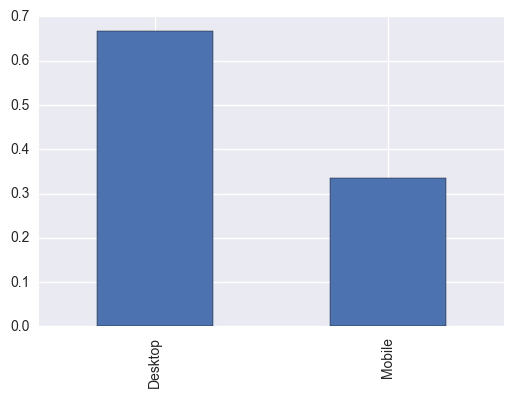

In [14]:
# shares of devices
print data['device'].value_counts(normalize = True)
data['device'].value_counts(normalize = True).plot.bar()

Mobile     0.668142
Desktop    0.331858
Name: device, dtype: float64


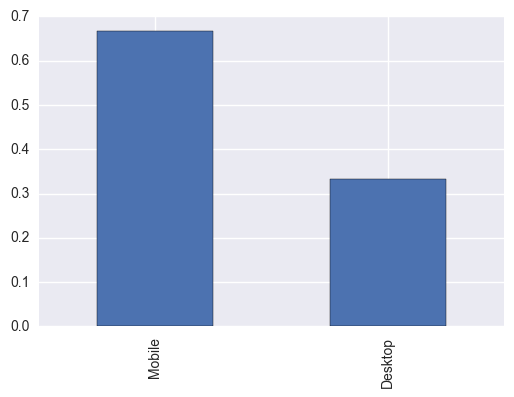

In [15]:
# shares of conversion per device --> device doesn't seem to impact conversion
print data.loc[data["confirmation"] == 1, 'device'].value_counts(normalize = True)
data.loc[data["confirmation"] == 1, 'device'].value_counts(normalize = True).plot.bar()

In [16]:
# 120 days of data
len(data.date.unique())

120

In [24]:
data.date = pd.to_datetime(data.date)

In [25]:
# create month var to investigate the monthly trends
data['month_of_year'] = data['date'].dt.month

In [26]:
# have a look of there are weekly patterns
# create a variable day of the week (weekday) from date

data['day_of_week'] = data['date'].dt.weekday

In [27]:
# I also want to add week of months as a variable (wom)
data['week_of_month'] = data['date'].apply(lambda d: (d.day-1) // 7 + 1)

In [28]:
# and an overall weekcount in my dataset period
data['week_count'] = data['date'].dt.week

In [29]:
# how many records are there for each month
data.month_of_year.value_counts()

4    22600
3    22600
2    22600
1    22600
Name: month_of_year, dtype: int64

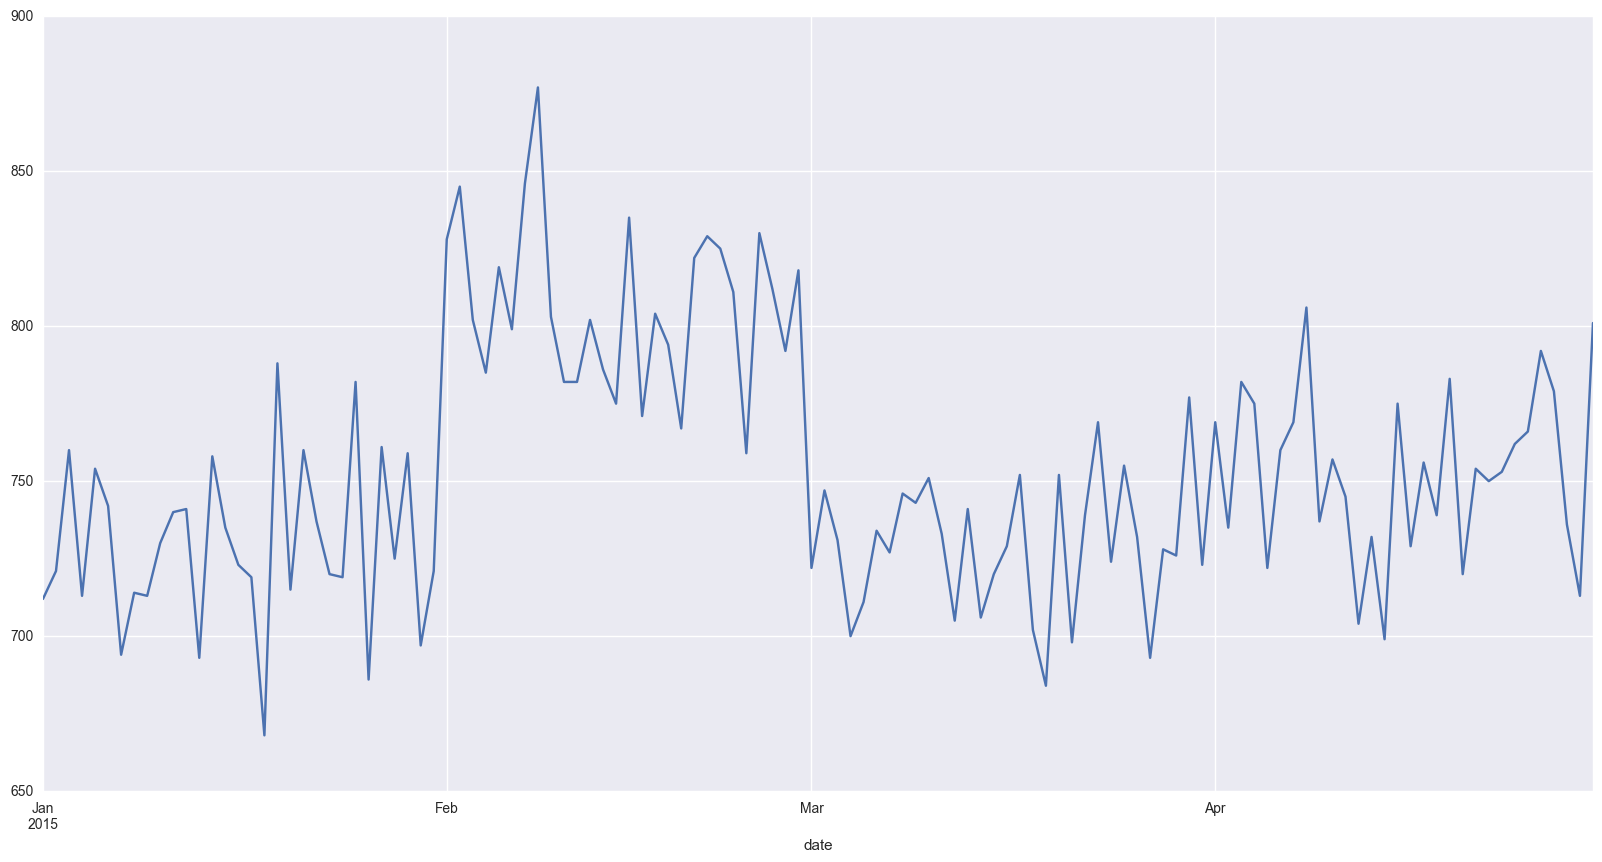

In [31]:
# plot traffic in general
plt.rcParams['figure.figsize'] = (20.0, 10.0)
day_grouping = data.groupby(['date'])
day_grouping['user_id'].count().plot.line()

There seems to be a growth of traffic in february - but, as we already know, the data imcludes 22.600 observations for every month, so the growth/day only results from february having fewer days than january and march. this changes the volume per day.

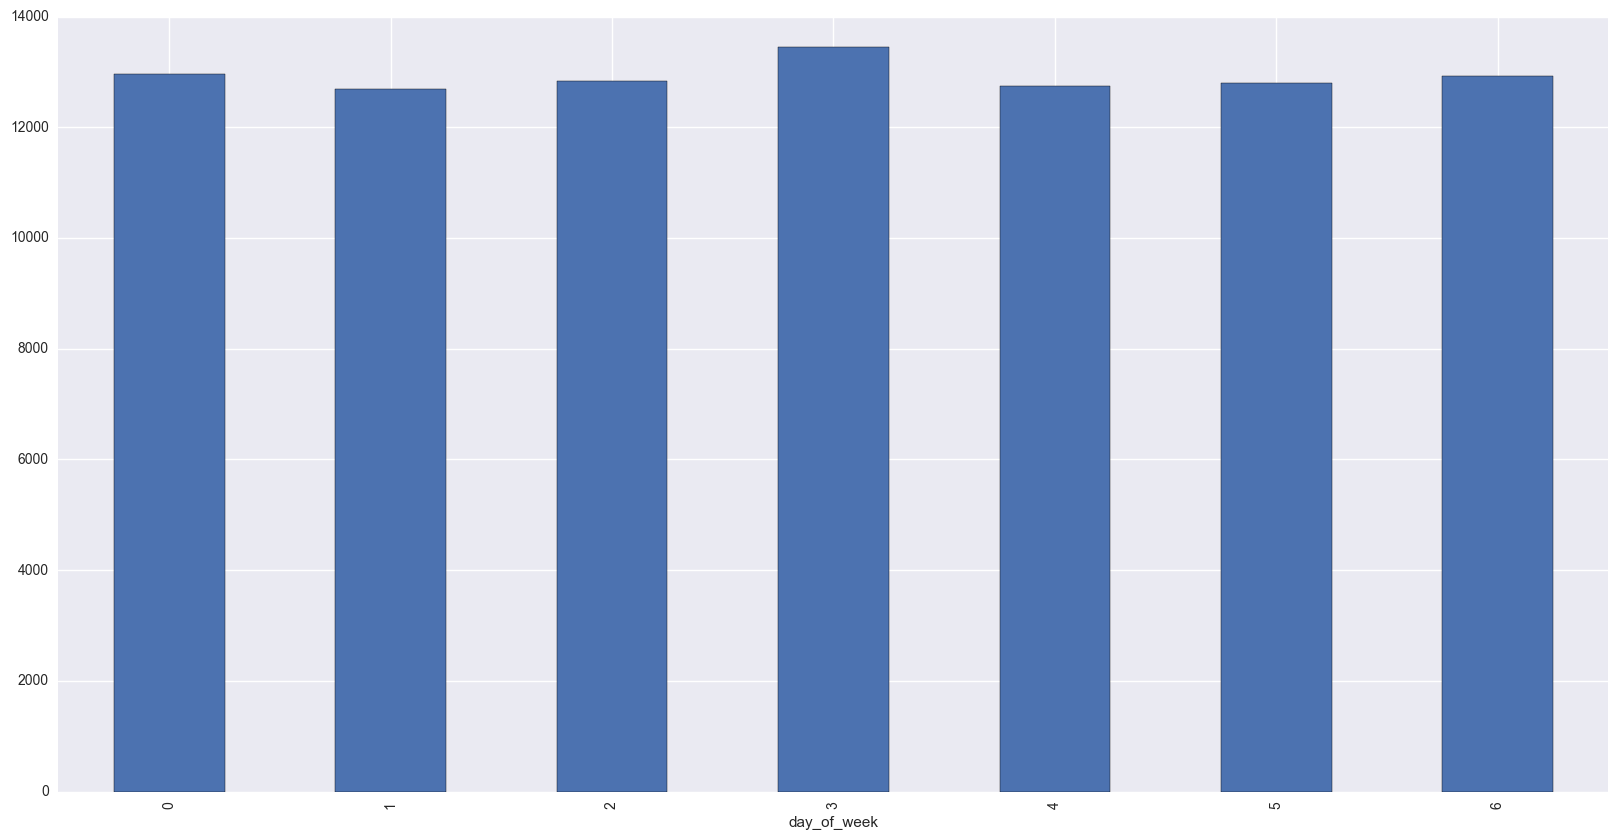

In [53]:
device_dow_grouping = data.groupby(['day_of_week'])
device_dow_grouping['user_id'].count().plot.bar()

Traffic seems pretty stable over the week. With a small peak on wednesday.
How about conversion?

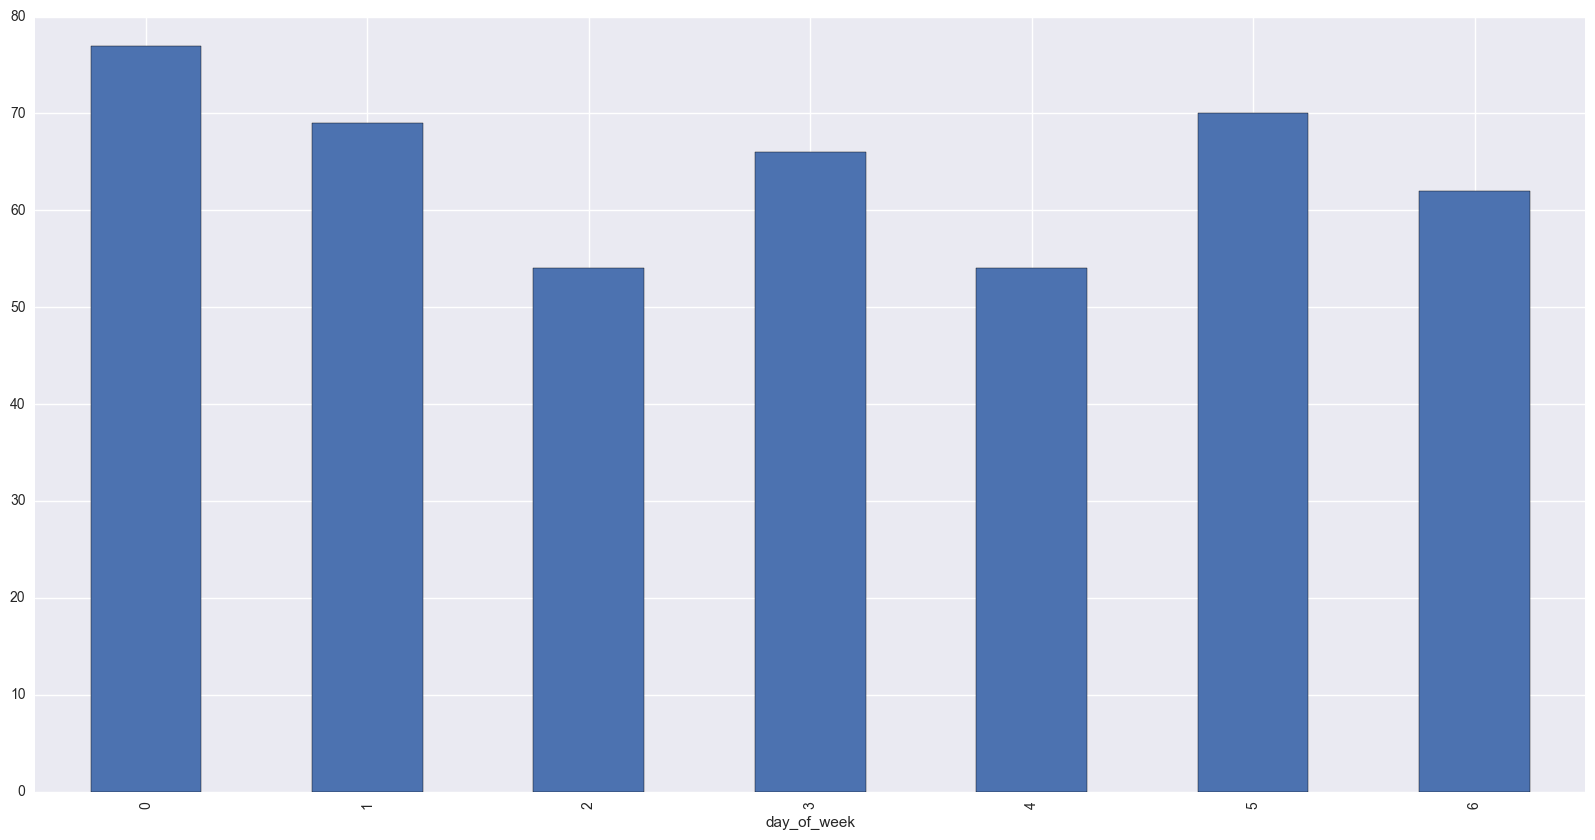

In [55]:
device_dow_grouping['confirmation'].sum().plot.bar()

There is a bit more variation going on here! So most conversion on Monday. And then there seems to be some every other day rythm ...

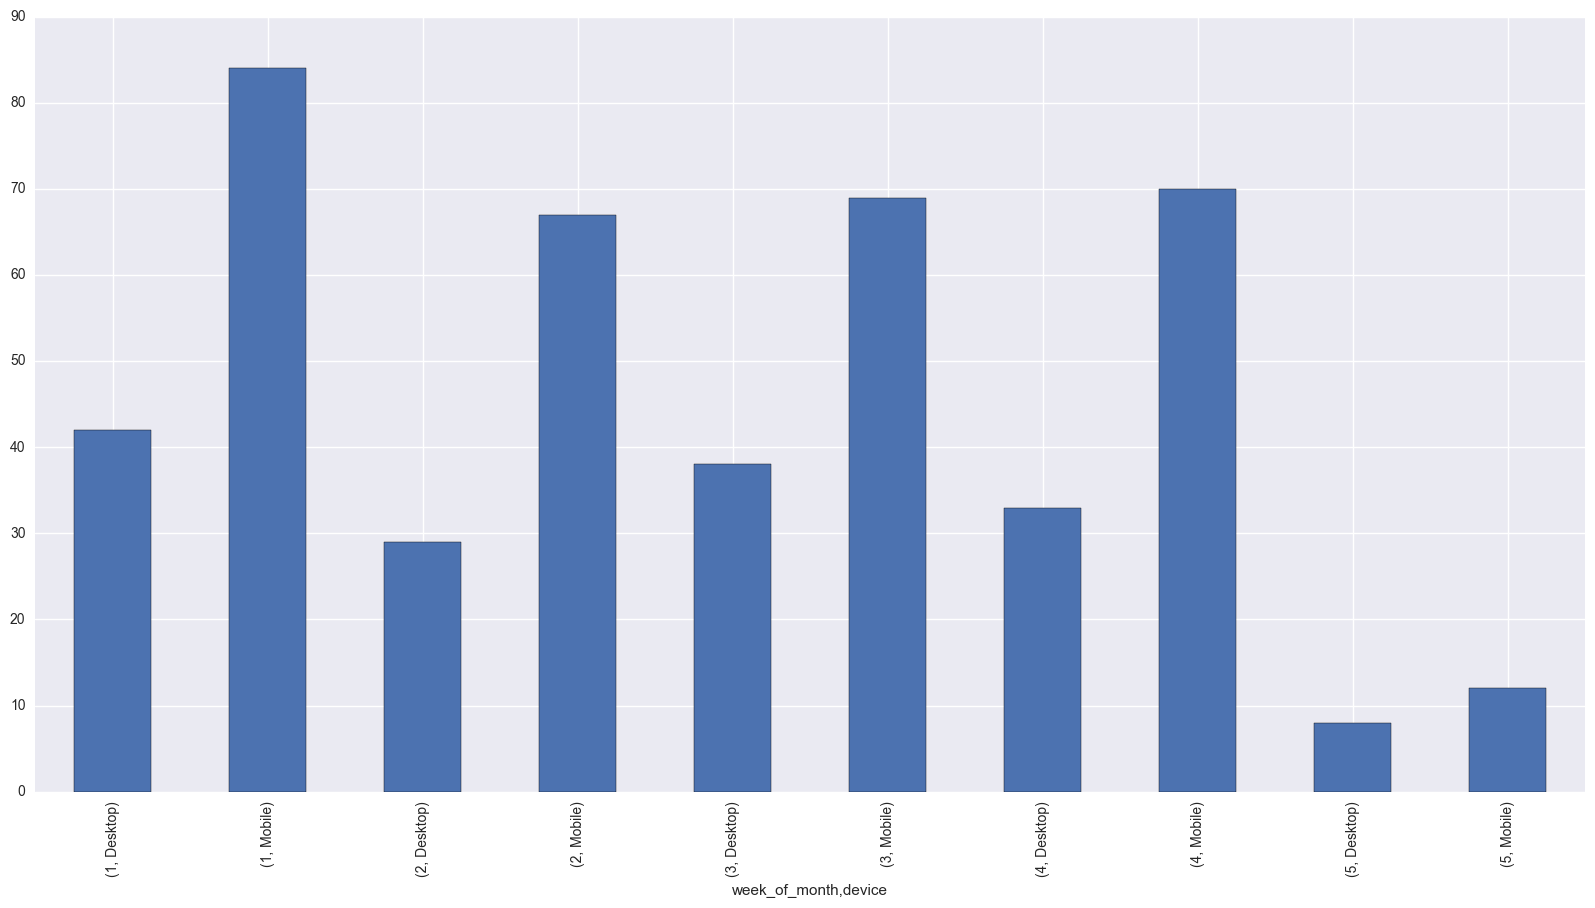

In [60]:
device_wom_grouping = data.groupby(['week_of_month','device'])
device_wom_grouping['confirmation'].sum().plot.bar()

There is also a bit more conversion at the beginning of the month. Which makes sense. (after the paycheck)

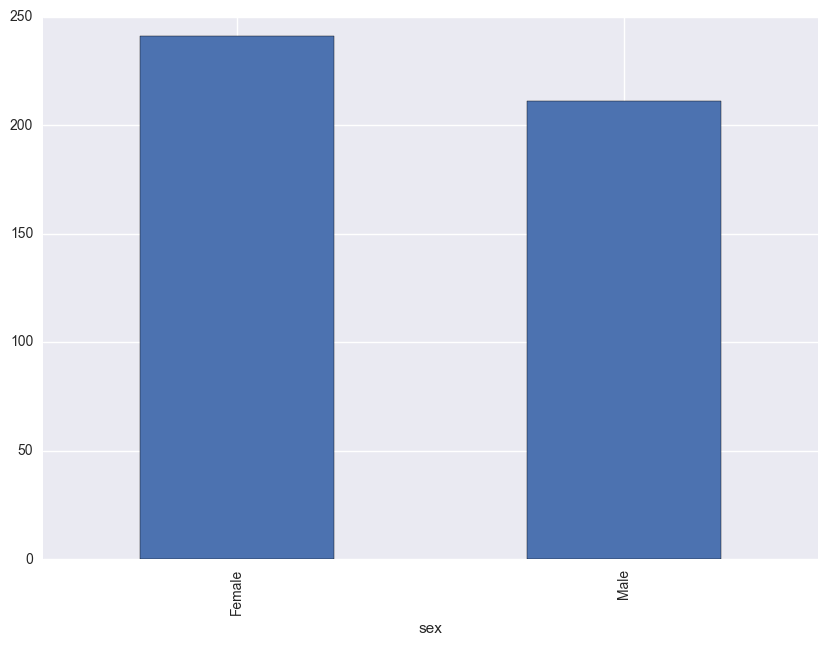

In [65]:
# what about gender?
plt.rcParams['figure.figsize'] = (10.0, 7.0)
device_sex_grouping = data.groupby(['sex'])
device_sex_grouping['confirmation'].sum().plot.bar()

Considering, that the share of female (45.075) and male (45.325) is pretty close, women are more likely to convert. (especially on mobile)

In [59]:
# check the funnel
data.head()

,user_id,date,device,sex,search,payment,confirmation,month_of_year,day_of_week,week_of_month,week_count
0,450007,2015-02-28,Desktop,Female,0,0,0,2,5,4,9
1,756838,2015-01-13,Desktop,Male,0,0,0,1,1,2,3
2,568983,2015-04-09,Desktop,Male,1,0,0,4,3,2,15
3,190794,2015-02-18,Desktop,Female,1,0,0,2,2,3,8
4,537909,2015-01-15,Desktop,Male,0,0,0,1,3,3,3


In [66]:
data.device.value_counts()

Desktop    60200
Mobile     30200
Name: device, dtype: int64

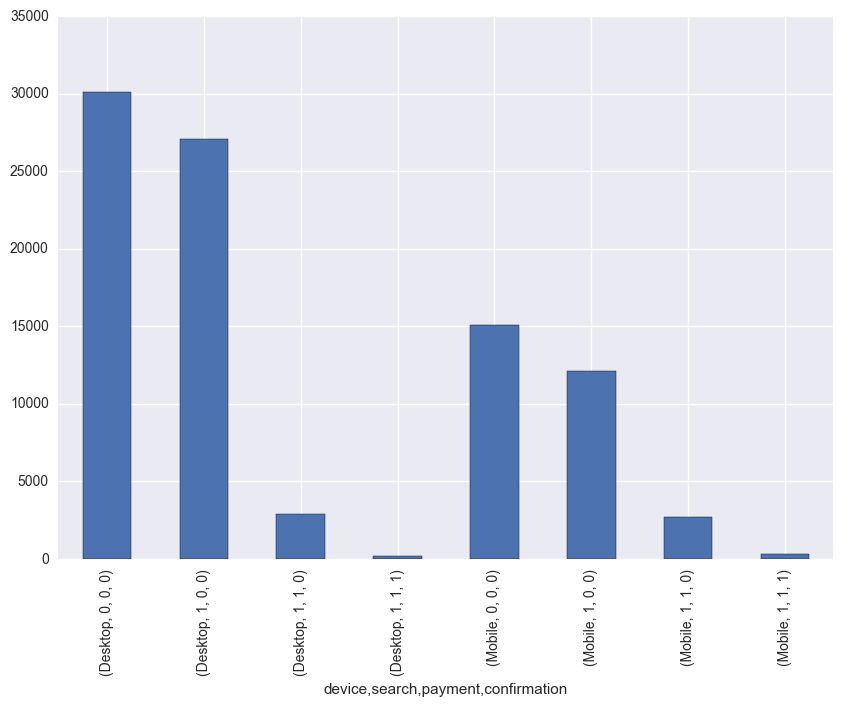

In [67]:
# determine drop out rate throughout the Funnel (home - search - payment - confirmation)
funnel_grouping = data.groupby(['device','search', 'payment', 'confirmation']).count()
funnel_grouping.user_id.plot.bar()

That looks interesting!
Seems like there are about double as many desktop users landing on the home and search page, but there is a huge drop out between the search and the payment page and at the end there are less desktop users converting than mobile users.


In [68]:
funnel_grouping.head(20)

user_id   date    sex  month_of_year  \
device  search payment confirmation                                         
Desktop 0      0       0               30100  30100  30100          30100   
        1      0       0               27090  27090  27090          27090   
               1       0                2860   2860   2860           2860   
                       1                 150    150    150            150   
Mobile  0      0       0               15100  15100  15100          15100   
        1      0       0               12080  12080  12080          12080   
               1       0                2718   2718   2718           2718   
                       1                 302    302    302            302   

                                     day_of_week  week_of_month  week_count  
device  search payment confirmation                                          
Desktop 0      0       0                   30100          30100       30100  
        1      0       0                   27090          27090       27090  
               1       0                    2860           2860        2860  
                       1                     150            150         150  
Mobile  0      0       0                   15100          15100       15100  
        1      0       0                   12080          12080       12080  
               1       0                    2718           2718        2718  
                       1                     302            302         302

In [69]:
X = data.copy()

In [70]:
X[['search','payment','confirmation']] = X[['search','payment','confirmation']].apply(pd.to_numeric)

In [71]:
X.dtypes

user_id                   int64
date             datetime64[ns]
device                   object
sex                      object
search                    int64
payment                   int64
confirmation              int64
month_of_year             int64
day_of_week               int64
week_of_month             int64
week_count                int64
dtype: object

In [72]:
X.date = pd.to_datetime(X.date )

In [73]:
categorical_variables = list(X.dtypes[X.dtypes == "object"].index)

In [74]:
categorical_variables

['device', 'sex']

In [75]:
categorical_variables.extend(['day_of_week', 'week_of_month', 'week_count'])

In [76]:
for variable in categorical_variables:
    # fill missing data with word 'Missing'
    X[variable].fillna('Missing', inplace = True)
    # create array of Dummies
    dummies = pd.get_dummies(X[variable], prefix = variable, drop_first= True)
    # update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis = 1)
    X.drop([variable], axis = 1, inplace = True)

In [77]:
X.head()

,user_id,date,search,payment,confirmation,month_of_year,device_Mobile,sex_Male,day_of_week_1,day_of_week_2,...,week_count_9,week_count_10,week_count_11,week_count_12,week_count_13,week_count_14,week_count_15,week_count_16,week_count_17,week_count_18
0,450007,2015-02-28,0,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,756838,2015-01-13,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,568983,2015-04-09,1,0,0,4,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,190794,2015-02-18,1,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,537909,2015-01-15,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y = X.pop('confirmation')

In [79]:
y.shape

(90400,)

In [80]:
X.shape

(90400, 34)

In [81]:
from __future__ import print_function

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import subprocess
import itertools
import os

In [82]:
X = X.drop(['user_id','date'], axis = 1)

In [83]:
X.head()

,search,payment,month_of_year,device_Mobile,sex_Male,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,week_count_9,week_count_10,week_count_11,week_count_12,week_count_13,week_count_14,week_count_15,week_count_16,week_count_17,week_count_18
0,0,0,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,4,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y ,random_state=3)

In [85]:
# start with a decision tree to analyze feature importances
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 30)

In [86]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [87]:
dtree.score (X_test, y_test)

0.99499446902654864

This is not better than base line (0,995)!

In [88]:
dtree.feature_importances_

array([ 0.        ,  0.85493331,  0.        ,  0.11869776,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.0117837 ,
        0.        ,  0.        ,  0.01458522,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

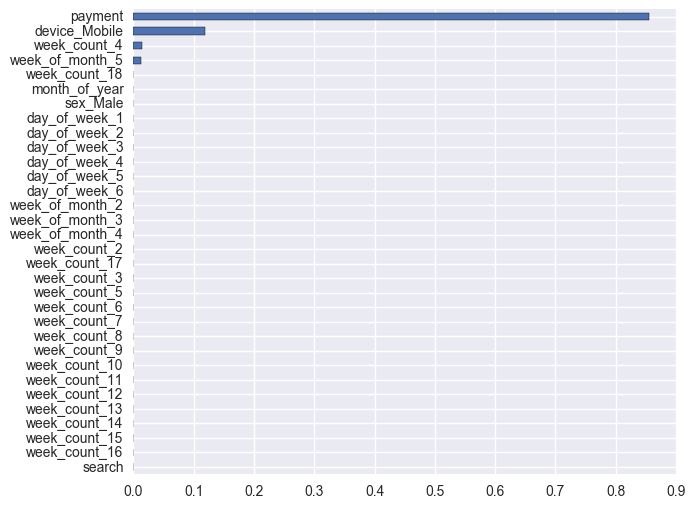

In [89]:
# simple version, that shows all Variables
feature_importances = pd.Series(dtree.feature_importances_, index = X.columns)
feature_importances.sort_values(inplace = True)
feature_importances.plot(kind = "barh", figsize =(7,6))

In [107]:
RFC = RandomForestClassifier(n_estimators = 1000, max_depth = 5, oob_score = True, random_state=42)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [108]:
# baseline with all pred = not-converted would be 0,995
RFC.oob_score_

0.99500368731563427

In [109]:
y_pred = RFC.predict(X_test)

In [110]:
# confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[35979     0]
 [  181     0]]


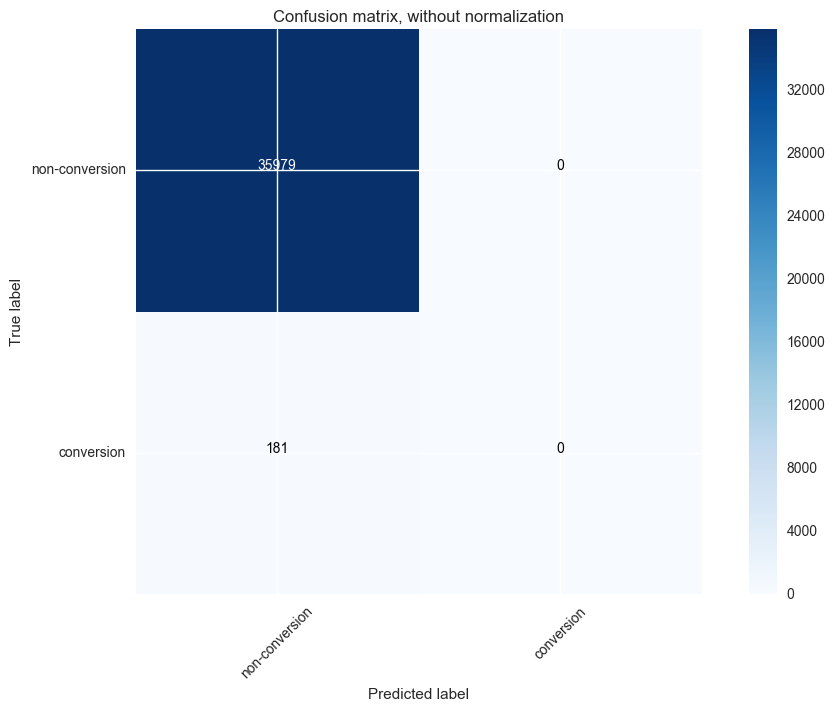

In [111]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non-conversion', 'conversion'],
                      title='Confusion matrix, without normalization')

We do have highly skewed classes so the classifier doesn't do a good job in predicting any positive cases. We can use balanced classes to get more TP at the cost of also more FP. Depending on the use case ... like contacting the most likely customers for ex. this can make sense.

In [112]:
RFC = RandomForestClassifier(n_estimators = 1000, class_weight= 'balanced', max_depth = 5, oob_score = True, random_state=42)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [114]:
# baseline with all pred = not-converted would be 0,995
RFC.oob_score_

0.93796091445427732

OOB_score is getting down due to our FP examples

In [116]:
y_pred = RFC.predict(X_test)

Confusion matrix, without normalization
[[33790  2189]
 [    0   181]]


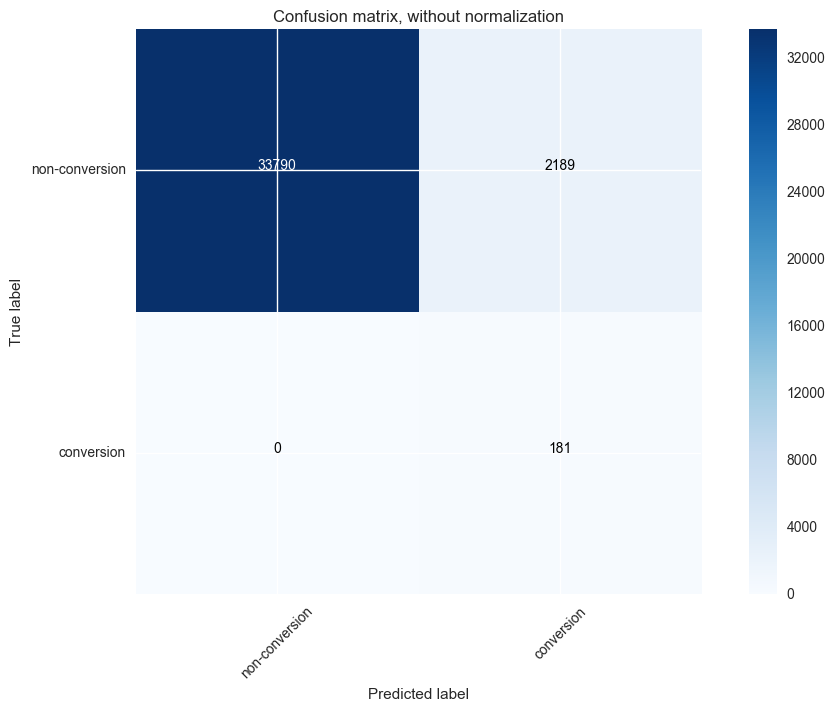

In [117]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non-conversion', 'conversion'],
                      title='Confusion matrix, without normalization')


But now the classifier isn't missing a single conversion case anymore. 

# insights & conclusions

### 1 There is an alarming overall trend of decreasing conversions, which can be observed on a monthly and on a weekly order. Actually it is not even a trend, but a sudden drop after Feb.

 PICTURE weekly and monthly

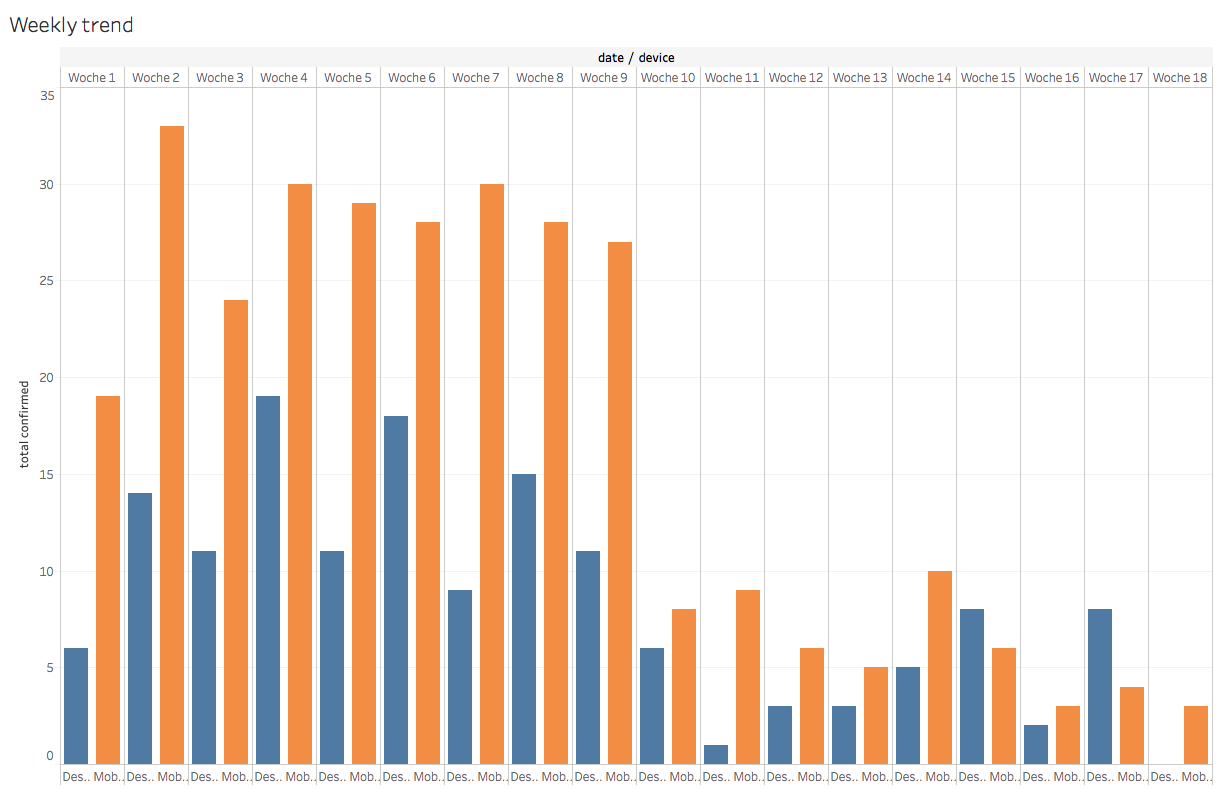

In [118]:
from IPython.core.display import Image
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/5_WEEKLY.png"))

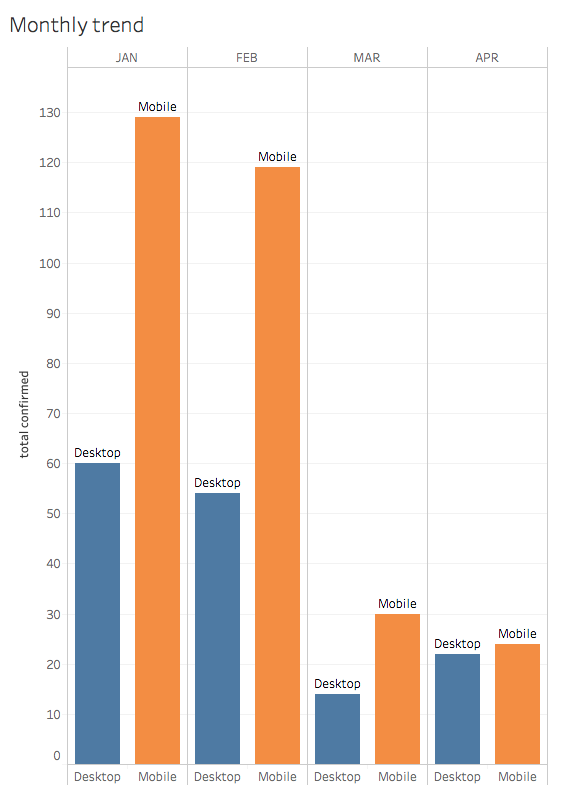

In [120]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/6_MONTHLY.png"))

### 2 Although the share of mobile users is one third (compared to two thirds of destop users) - mobile users are much more likely to convert (1 % compared to 0.25 % desktop users)

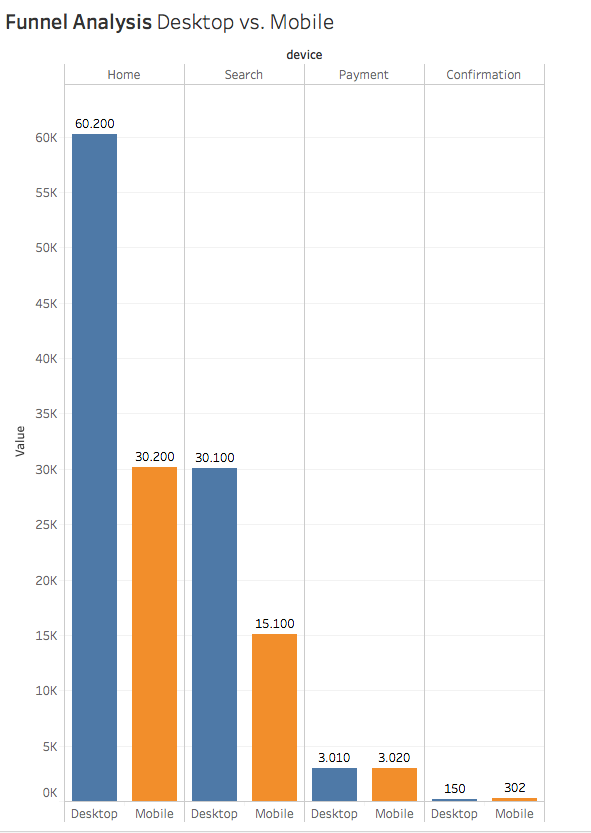

In [121]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/Funnel_Conversion_Rate2.png"))

in greater detail: 
- everthing seems fine with the HOME page, the same percentage of users (50%) is continueing for desktop and mobile users
- but at the SEARCH page, 10% of the mobile users continue to payment, but only 5% of the desktop users
- same about the CONFIRMATION page,  10% of the mobile users from PAYMENT continue, but only 5% of the desktop users
This definitely needs some further research and inspection.

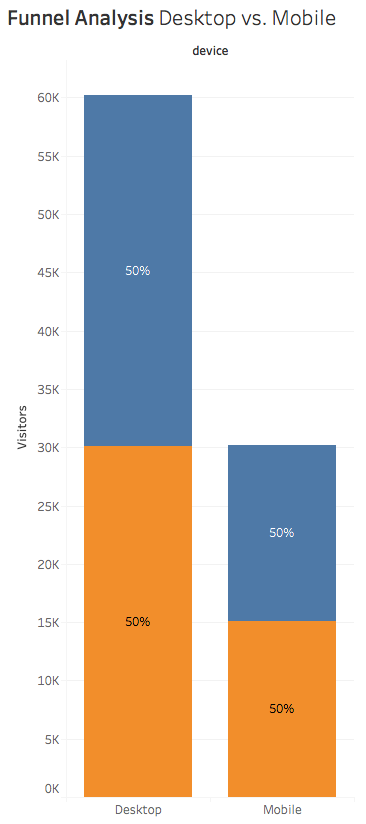

In [122]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/1_SEARCH.png"))

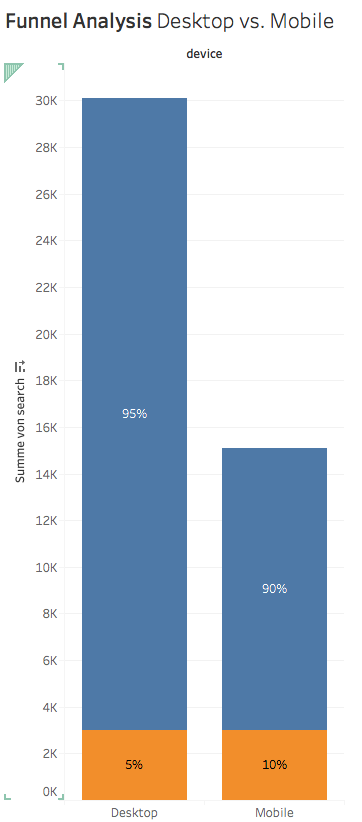

In [124]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/2_PAYMENT.png"))

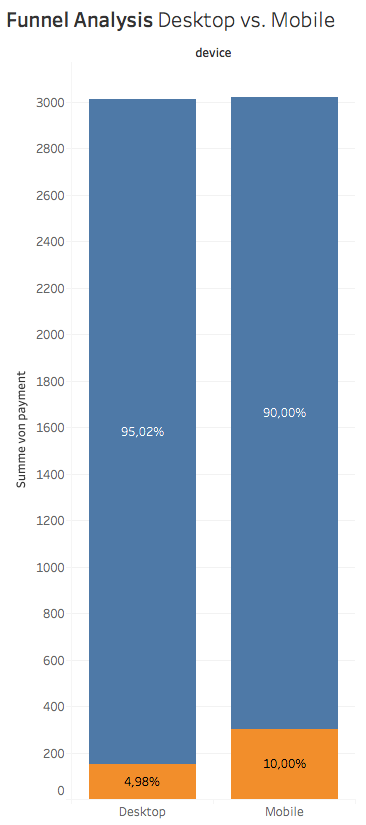

In [125]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/3_CONFIRM.png"))

### 3 Conversion rate is best for female mobile users. (1.1%) compared to male mobile users (0.8 %)

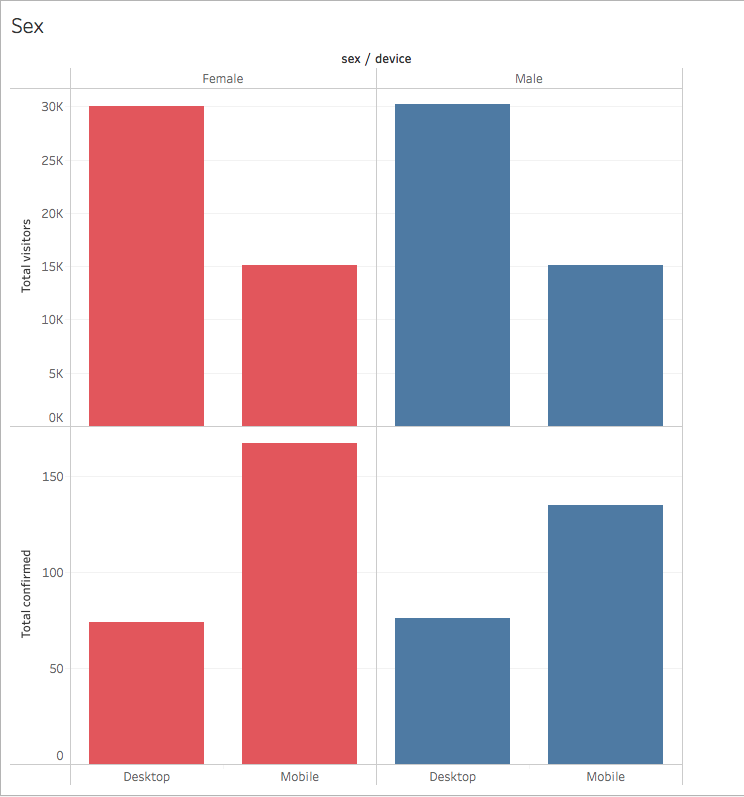

In [126]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/4_SEX.png"))

### MORE

As the data seems to be sampled. (it is not likely to have the exact same amount of obsverations for every month) - it should be checked if these are really random samples to double check the conclusions.

There is a certain every other day pattern of up and down (especially for desktop), which could be analyzed more in depth.

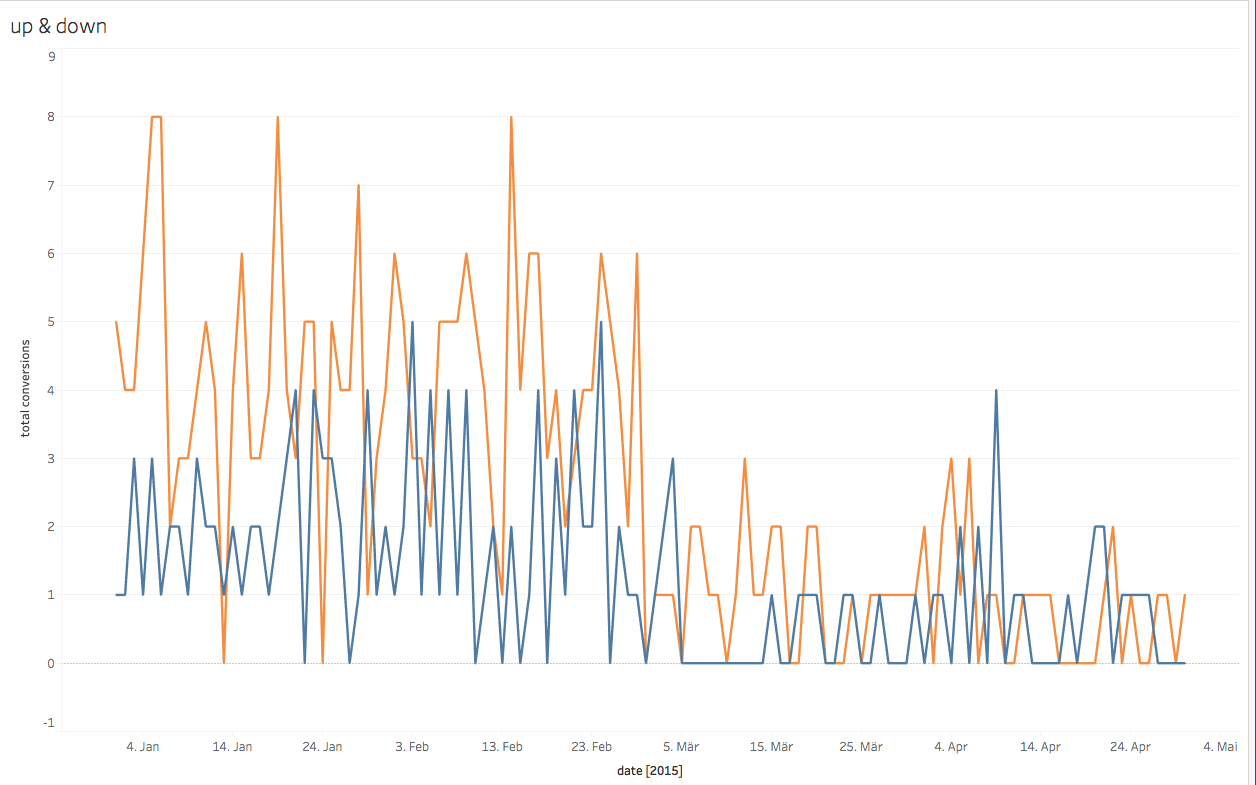

In [127]:
Image(filename = ("/COGNAC/LERNEN/DSE/Take_Home_Challenges/Funnel_Analysis/up_and_down.png"))